In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE


In [2]:
# Importar df downtime limpiio
TablaMaestraDowntime = pd.read_csv("/content/TablaMaestraDowntime.csv")

In [3]:
# Visualizamos el dataframe TablaMaestraDowntime
TablaMaestraDowntime

,Unnamed: 0,EventID,ScheduleID,AssetName,DownStart,DownEnd,Reason,Category,DownStart_dia,DownStart_mes,DownStart_año,Total_Duration,Fault_Number,Category_Number,ShiftNumber,OEE,Total_Time,Production_Goal,Planned_Rate,DayOfWeek
0,0,1052248,25579,Bench 100D,2022-01-06,2022-01-06,Falla 49: Lifter MarkerPosn. Superior,Position Sensor Faults,6,1,2022,12,49,3,1,1.0,600,157,15.7,3
1,1,1052250,25579,Bench 100D,2022-01-06,2022-01-06,Falla 58: C-Clip Posn. Extendida,Position Sensor Faults,6,1,2022,2,58,3,1,1.0,600,157,15.7,3
2,2,1052253,25579,Bench 100D,2022-01-06,2022-01-06,Falla189. Paremtro Close lenght Tolerancia Act...,Position Sensor Faults,6,1,2022,1,189,3,1,1.0,600,157,15.7,3
3,3,1052265,25579,Bench 100D,2022-01-06,2022-01-06,Falla 49: Lifter MarkerPosn. Superior,Position Sensor Faults,6,1,2022,1,49,3,1,1.0,600,157,15.7,3
4,4,1052274,25579,Bench 100D,2022-01-06,2022-01-06,Falla 102: Disponible,Other Faults,6,1,2022,8,102,9,1,1.0,600,157,15.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50950,50950,1717115,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,2,1.0,336,0,20.0,1
50951,50951,1717120,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,2,1.0,336,0,20.0,1
50952,50952,1717121,59167,Bench 100D,2024-05-07,2024-05-07,Falla 12. Scanner de Seguridad Interrumpido Du...,Scanner Faults,7,5,2024,2,12,6,2,1.0,336,0,20.0,1
50953,50953,1717122,59167,Bench 100D,2024-05-07,2024-05-07,Falla35. Servo Pin Izquierdo Longitud Fallo,Servo Support Faults,7,5,2024,1,35,0,2,1.0,336,0,20.0,1


In [4]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Definir las características y los transformadores
categorical_features = ['Category']
numeric_features = ['Total_Duration', 'Total_Time', 'Production_Goal', 'Planned_Rate', 'DownStart_dia', 'DownStart_mes', 'DayOfWeek']

# Transformador para escalar las características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Cambiar de StandardScaler a MinMaxScaler
])

# Transformador para codificar características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar los transformadores
processed_data = preprocessor.fit_transform(TablaMaestraDowntime)

# Obtener nombres de características one-hot
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Obtener todos los nombres de las características
feature_names = numeric_features + list(onehot_feature_names)

# Convertir la matriz procesada a un DataFrame con los nombres de las características
processed_df = pd.DataFrame(processed_data, columns=feature_names)

# Verificar el DataFrame procesado
print(processed_df.head())


   Total_Duration  Total_Time  Production_Goal  Planned_Rate  DownStart_dia  \
0        0.000025    0.571429         0.069255      0.058874       0.166667   
1        0.000013    0.571429         0.069255      0.058874       0.166667   
2        0.000011    0.571429         0.069255      0.058874       0.166667   
3        0.000011    0.571429         0.069255      0.058874       0.166667   
4        0.000020    0.571429         0.069255      0.058874       0.166667   

   DownStart_mes  DayOfWeek  Category_Electrical Faults  \
0            0.0        0.5                         0.0   
1            0.0        0.5                         0.0   
2            0.0        0.5                         0.0   
3            0.0        0.5                         0.0   
4            0.0        0.5                         0.0   

   Category_External Device Faults  Category_Invalid Parameters  \
0                              0.0                          0.0   
1                              0.0  

In [5]:
processed_df

,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Electrical Faults,Category_External Device Faults,Category_Invalid Parameters,Category_Other Faults,Category_Pin Position Faults,Category_Position Sensor Faults,Category_Relay Faults,Category_Scanner Faults,Category_Servo Pin Faults,Category_Servo Support Faults
0,0.000025,0.571429,0.069255,0.058874,0.166667,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000013,0.571429,0.069255,0.058874,0.166667,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.000011,0.571429,0.069255,0.058874,0.166667,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000011,0.571429,0.069255,0.058874,0.166667,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000020,0.571429,0.069255,0.058874,0.166667,0.000000,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50950,0.000011,0.257143,0.000000,0.074999,0.200000,0.363636,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50951,0.000011,0.257143,0.000000,0.074999,0.200000,0.363636,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50952,0.000013,0.257143,0.000000,0.074999,0.200000,0.363636,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50953,0.000011,0.257143,0.000000,0.074999,0.200000,0.363636,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
#Aplicar PCA
pca = PCA(n_components=10)  # Especifica el número de componentes principales deseados
pca_result = pca.fit_transform(processed_df)

In [7]:
# Obtener la varianza explicada por cada componente principal
variance_explained = pca.explained_variance_ratio_

# Imprimir los componentes principales y la varianza explicada
for i, variance in enumerate(variance_explained):
    print(f"Componente principal {i+1}: {variance:.2f}")

Componente principal 1: 0.32
Componente principal 2: 0.21
Componente principal 3: 0.13
Componente principal 4: 0.09
Componente principal 5: 0.08
Componente principal 6: 0.06
Componente principal 7: 0.04
Componente principal 8: 0.02
Componente principal 9: 0.02
Componente principal 10: 0.01


In [8]:
# Obtener la varianza explicada acumulada
cumulative_variance_explained = np.cumsum(variance_explained)

# Imprimir la varianza explicada acumulada
for i, variance in enumerate(cumulative_variance_explained):
    print(f"Varianza acumulada hasta el componente principal {i+1}: {variance:.2f}")

Varianza acumulada hasta el componente principal 1: 0.32
Varianza acumulada hasta el componente principal 2: 0.53
Varianza acumulada hasta el componente principal 3: 0.66
Varianza acumulada hasta el componente principal 4: 0.75
Varianza acumulada hasta el componente principal 5: 0.83
Varianza acumulada hasta el componente principal 6: 0.89
Varianza acumulada hasta el componente principal 7: 0.93
Varianza acumulada hasta el componente principal 8: 0.95
Varianza acumulada hasta el componente principal 9: 0.97
Varianza acumulada hasta el componente principal 10: 0.98


In [9]:
# Crear un DataFrame para almacenar los resultados
pca_weights_df = pd.DataFrame(pca.components_, columns=processed_df.columns)

# Imprimir los resultados
print("PCA y sus pesos por variable:")
pca_weights_df

PCA y sus pesos por variable:


,Total_Duration,Total_Time,Production_Goal,Planned_Rate,DownStart_dia,DownStart_mes,DayOfWeek,Category_Electrical Faults,Category_External Device Faults,Category_Invalid Parameters,Category_Other Faults,Category_Pin Position Faults,Category_Position Sensor Faults,Category_Relay Faults,Category_Scanner Faults,Category_Servo Pin Faults,Category_Servo Support Faults
0,0.000021,0.005366,0.001162,-0.000363,0.017612,-0.012402,-0.006211,0.000729,0.003091,0.006420,0.006967,0.061519,0.107121,0.011972,0.595368,0.000224,-0.793411
1,0.000172,0.039284,0.003142,-0.009173,0.084297,-0.277889,0.011092,0.001744,0.005435,0.016618,0.020329,0.238333,0.622429,0.027242,-0.595445,0.000466,-0.337151
2,0.000106,-0.001412,-0.002686,-0.002882,0.068340,-0.100598,0.006190,0.001613,0.005474,0.015054,0.018086,0.784974,-0.572623,0.027705,-0.153104,0.000407,-0.127584
3,0.000018,0.021429,0.039498,-0.002296,-0.540893,0.781329,0.022996,-0.000587,0.020364,0.002997,-0.020490,0.162211,0.103263,0.054704,-0.186631,0.001143,-0.136974
4,0.000132,0.037722,0.027092,-0.007757,0.820940,0.539154,-0.157580,0.004125,0.013202,0.007471,0.003767,0.009404,0.041428,0.022288,-0.068281,-0.000300,-0.033103
5,0.001367,-0.243160,-0.021554,0.005346,0.144051,0.077035,0.955690,-0.001827,-0.005664,-0.004568,-0.005252,-0.001383,0.013288,0.008125,0.001715,-0.000257,-0.004177
6,0.000768,-0.014232,-0.008158,0.000969,-0.006068,-0.044336,-0.000303,0.011876,0.060510,0.167736,0.191102,-0.360431,-0.312803,0.753981,-0.263140,0.003694,-0.252525
7,-0.000194,0.101017,0.019889,-0.009558,-0.018053,0.025965,0.039187,0.013276,0.093748,0.471858,0.606263,-0.180224,-0.169815,-0.526547,-0.158449,0.004512,-0.154621
8,0.000341,0.104787,-0.003673,-0.014230,0.006702,-0.014752,0.027457,0.001483,0.014239,0.747521,-0.652753,-0.024151,-0.024788,-0.032780,-0.014303,0.000731,-0.015198
9,0.000048,0.952927,0.063265,-0.033568,0.013863,-0.011980,0.241677,-0.014377,-0.050941,-0.121546,0.017633,0.008145,-0.006672,0.077169,0.048746,0.000255,0.041589


##Para implementar técnicas de ensamble con tu conjunto de datos, podemos

---

utilizar varios modelos y combinarlos para mejorar el rendimiento. Un enfoque común es utilizar el bagging con Random Forest, el boosting con Gradient Boosting, y la combinación de ambos mediante el stacking.

###A continuación, te muestro cómo hacerlo:

-Random Forest (bagging)

-Gradient Boosting (boosting)

**-Stacking para combinar múltiples modelos**

#Ejemplo 1 - Conjunto de Training 80% - Test 20%

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Cargar y preparar los datos (asegúrate de reemplazar 'processed_df' con tu DataFrame)
X = processed_df.drop(columns=['Total_Duration'])
y = processed_df['Total_Duration']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo para la selección de características
selector_model = RandomForestRegressor(n_estimators=50, random_state=42)
selector_model.fit(X_train_scaled, y_train)

# Usar la importancia de las características para seleccionar las más relevantes
selector = SelectFromModel(selector_model, prefit=True, threshold="mean")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Ver cuántas características se han seleccionado
print("Número de características seleccionadas:", X_train_selected.shape[1])

# Opcional: Ver las características seleccionadas
selected_features = selector.get_support(indices=True)
print("Características seleccionadas:", X.columns[selected_features])

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
rf_predictions = rf_model.predict(X_test_selected)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)
gb_predictions = gb_model.predict(X_test_selected)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting MSE: {gb_mse}")

# Stacking
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train_selected, y_train)
stacking_predictions = stacking_model.predict(X_test_selected)
stacking_mse = mean_squared_error(y_test, stacking_predictions)
print(f"Stacking MSE: {stacking_mse}")


Número de características seleccionadas: 7
Características seleccionadas: Index(['Total_Time', 'Production_Goal', 'Planned_Rate', 'DownStart_dia',
       'DownStart_mes', 'Category_Position Sensor Faults',
       'Category_Scanner Faults'],
      dtype='object')
Random Forest MSE: 2.5959675919451804e-05
Gradient Boosting MSE: 1.930291428587443e-05
Stacking MSE: 1.77880888298603e-05


Los resultados que has obtenido indican que has seleccionado 7 características para tu modelo después de algún proceso de selección o evaluación. Además, los errores cuadráticos medios (MSE) para tus modelos de Random Forest, Gradient Boosting y Stacking son extremadamente bajos, lo que sugiere que tus modelos están ajustándose muy bien a los datos.

Aquí tienes un resumen de los resultados que has compartido:

Número de características seleccionadas: 7

Características seleccionadas: ['Total_Time', 'Production_Goal', 'Planned_Rate', 'DownStart_dia', 'DownStart_mes', 'Category_Position Sensor Faults', 'Category_Scanner Faults']

Random Forest MSE: 2.5959675919451804e-05

Gradient Boosting MSE: 1.930291428587443e-05

Stacking MSE: 1.77880888298603e-05

Interpretación:

Número de características seleccionadas: Esto indica que después del proceso de selección de características, has decidido utilizar 7 características específicas para entrenar tus modelos.

Características seleccionadas: Las características seleccionadas incluyen variables como tiempo total, meta de producción, tasa planificada, día y mes de inicio, y algunas categorías específicas de fallos como sensores de posición y fallos de escáner.

MSE de los modelos: Los valores de MSE para Random Forest, Gradient Boosting y Stacking son extremadamente bajos, lo cual es indicativo de un buen ajuste de los modelos a los datos de entrenamiento. Un MSE tan bajo sugiere que los modelos están prediciendo muy cerca de los valores reales de tus datos de prueba.

En resumen, los resultados son muy positivos y sugieren que tus modelos están funcionando bien con las características seleccionadas.

##Validación cruzada

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline

# Cargar y preparar los datos
X = processed_df.drop(columns=['Total_Duration'])
y = processed_df['Total_Duration']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar un modelo para la selección de características
selector_model = RandomForestRegressor(n_estimators=50, random_state=42)
selector_model.fit(X_train_scaled, y_train)

# Usar la importancia de las características para seleccionar las más relevantes
selector = SelectFromModel(selector_model, prefit=True, threshold="mean")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Modelos
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
stacking = StackingRegressor(
    estimators=[('rf', random_forest), ('gb', gradient_boosting)],
    final_estimator=GradientBoostingRegressor(n_estimators=100, random_state=42)
)

# Validación cruzada
def cross_val_scores(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-scores).mean()

# Evaluación
rf_cv_score = cross_val_scores(random_forest, X_train_selected, y_train)
gb_cv_score = cross_val_scores(gradient_boosting, X_train_selected, y_train)
stacking_cv_score = cross_val_scores(stacking, X_train_selected, y_train)

print("Random Forest CV MSE:", rf_cv_score)
print("Gradient Boosting CV MSE:", gb_cv_score)
print("Stacking CV MSE:", stacking_cv_score)


Random Forest CV MSE: 0.008115643992443161
Gradient Boosting CV MSE: 0.0075641408225858185
Stacking CV MSE: 0.007903286154417396


Los resultados que has proporcionado son métricas de desempeño de un modelo de regresión, evaluadas tanto en el conjunto de entrenamiento como en el conjunto de prueba. Aquí está la interpretación de cada una de ellas:

Desempeño en el Conjunto de Entrenamiento:
Error cuadrático medio (MSE): Es una medida de la calidad de la predicción. Un MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales. En este caso, el MSE es
6.559489098596328
×
1
0
−
5

6.559489098596328×10
−5
 .

Error absoluto medio (MAE): Es la media del valor absoluto de todos los errores de predicción sin considerar su dirección. En este caso, el MAE es

0.0005885285348914101

0.0005885285348914101.

Coeficiente de determinación (R²): Es una medida estadística que indica qué tan bien se ajustan los datos a la línea de regresión ajustada. Un valor más cercano a 1 indica un mejor ajuste. En este caso, el

𝑅
2
R
2
  es

0.002396753854529088

0.002396753854529088.

Desempeño en el Conjunto de Prueba:

Error cuadrático medio (MSE): Es el MSE calculado en el conjunto de datos de prueba, es decir, en datos que el modelo no ha visto durante el entrenamiento.

En este caso, el MSE es

1.7656524450584382×10−5

1.7656524450584382×10 −5
 , que es menor que el MSE en el conjunto de entrenamiento, lo cual es positivo ya que indica que el modelo generaliza bien a datos nuevos.

Error absoluto medio (MAE): Es el MAE calculado en el conjunto de prueba. En este caso, el MAE es

0.0005645130518752228

0.0005645130518752228.

Coeficiente de determinación (R²): Es el 𝑅2R2

calculado en el conjunto de prueba. En este caso, el
𝑅
2
R
2
  es

0.006556285411163709

0.006556285411163709.

Interpretación General:

Los valores de MSE y MAE en el conjunto de prueba son más bajos que en el conjunto de entrenamiento, lo cual indica que el modelo generaliza adecuadamente a nuevos datos.

Sin embargo, los valores de
𝑅
2
R
2
  son muy bajos tanto en entrenamiento como en prueba, lo cual sugiere que el modelo podría no estar capturando bien la variabilidad de los datos, o que la relación entre las características y la variable objetivo es débil.

En resumen, aunque los errores son bajos, el
𝑅
2
R
2
  bajo sugiere que el modelo puede no estar capturando completamente la relación entre las características y la variable objetivo. Esto podría ser un área para explorar mejoras en el modelo o en la selección de características.

#Predicciones - Valores Reales - Residuos

Desempeño en el conjunto de entrenamiento:
Error cuadrático medio (MSE): 6.559489098596328e-05
Error absoluto medio (MAE): 0.0005885285348914101
Coeficiente de determinación (R²): 0.002396753854529088

Desempeño en el conjunto de prueba:
Error cuadrático medio (MSE): 1.7656524450584382e-05
Error absoluto medio (MAE): 0.0005645130518752228
Coeficiente de determinación (R²): 0.006556285411163709


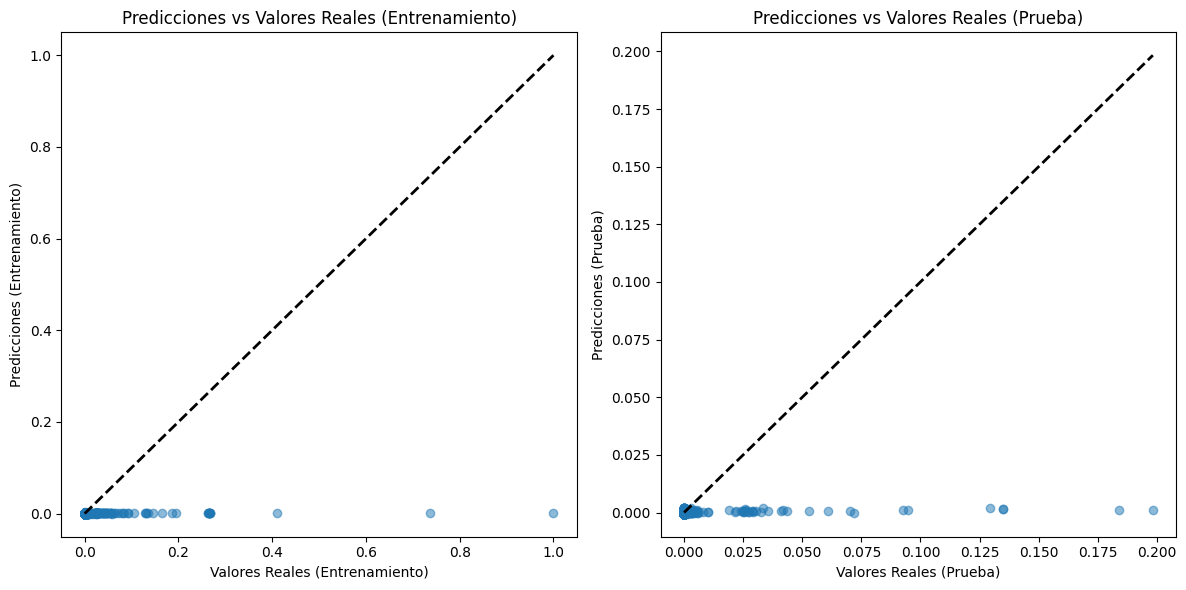

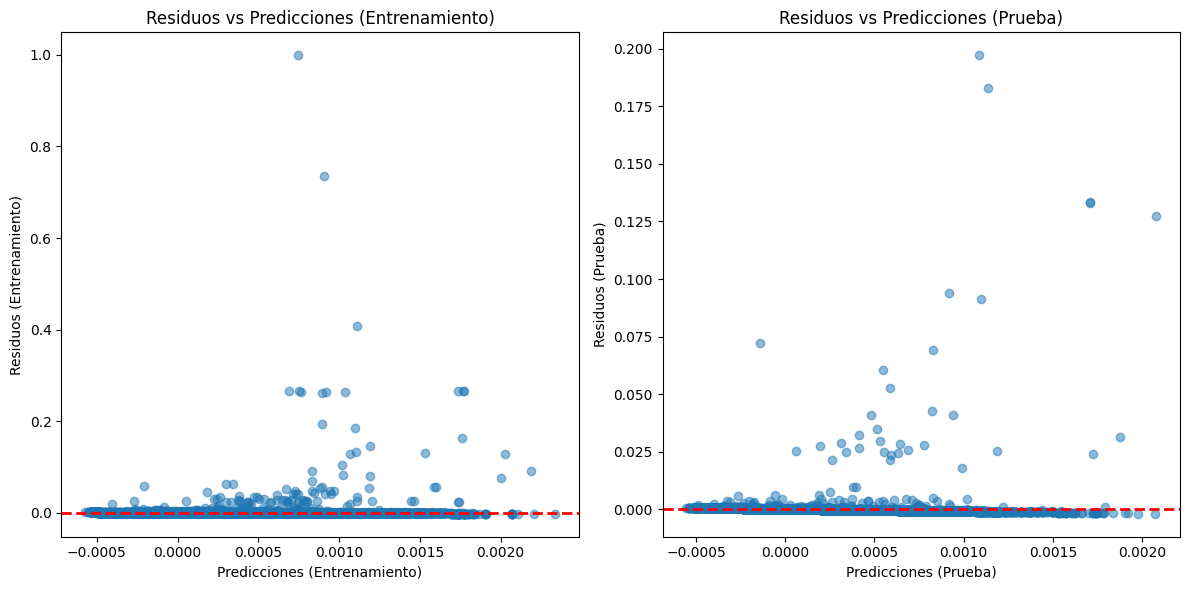

In [12]:
# Dividir los datos en conjunto de entrenamiento y prueba

X = processed_df.drop(columns=['Total_Duration'],axis=1)
y = processed_df['Total_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)

# Evaluar el modelo en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Desempeño en el conjunto de entrenamiento:")
print("Error cuadrático medio (MSE):", mse_train)
print("Error absoluto medio (MAE):", mae_train)
print("Coeficiente de determinación (R²):", r2_train)

# Evaluar el modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nDesempeño en el conjunto de prueba:")
print("Error cuadrático medio (MSE):", mse_test)
print("Error absoluto medio (MAE):", mae_test)
print("Coeficiente de determinación (R²):", r2_test)

# Crear gráficos de Predicciones vs Valores Reales para entrenamiento y prueba
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Valores Reales (Entrenamiento)')
plt.ylabel('Predicciones (Entrenamiento)')
plt.title('Predicciones vs Valores Reales (Entrenamiento)')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales (Prueba)')
plt.ylabel('Predicciones (Prueba)')
plt.title('Predicciones vs Valores Reales (Prueba)')

plt.tight_layout()
plt.show()

# Crear gráficos de Residuos vs Predicciones para entrenamiento y prueba
plt.figure(figsize=(12, 6))

# Gráfico para el conjunto de entrenamiento
plt.subplot(1, 2, 1)
residuos_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuos_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicciones (Entrenamiento)')
plt.ylabel('Residuos (Entrenamiento)')
plt.title('Residuos vs Predicciones (Entrenamiento)')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
residuos_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuos_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicciones (Prueba)')
plt.ylabel('Residuos (Prueba)')
plt.title('Residuos vs Predicciones (Prueba)')

plt.tight_layout()
plt.show()

Los resultados que has proporcionado indican el desempeño de un modelo en un problema de regresión, evaluado en conjuntos separados para entrenamiento y prueba. Aquí está la interpretación de cada métrica:

Desempeño en el Conjunto de Entrenamiento:
Error cuadrático medio (MSE): Es una medida de la calidad de la predicción que indica el promedio de los cuadrados de los errores. En este caso, el MSE es
6.559489098596328
×
1
0
−
5
6.559489098596328×10
−5
 , lo cual significa que las predicciones del modelo en promedio tienen un error cuadrático de aproximadamente
0.0000656
0.0000656.

Error absoluto medio (MAE): Es la media del valor absoluto de todos los errores de predicción. Aquí, el MAE es
0.0005885285348914101
0.0005885285348914101, lo que indica que las predicciones tienen un error absoluto promedio de aproximadamente
0.0005885
0.0005885.

Coeficiente de determinación (R²): Es una medida estadística que indica qué tan bien se ajustan los datos a la línea de regresión ajustada. Un valor más cercano a 1 indica un mejor ajuste del modelo a los datos. En este caso, el
𝑅
2
R
2
  es
0.002396753854529088
0.002396753854529088, lo cual es muy bajo y sugiere que el modelo explica muy poco de la variabilidad de los datos de entrenamiento.

Desempeño en el Conjunto de Prueba:
Error cuadrático medio (MSE): Es el MSE calculado en el conjunto de datos de prueba, que son datos que el modelo no ha visto durante el entrenamiento. Aquí, el MSE es
1.7656524450584382
×
1
0
−
5
1.7656524450584382×10
−5
 , indicando que las predicciones en el conjunto de prueba tienen un MSE más bajo que en el conjunto de entrenamiento. Esto es positivo y sugiere que el modelo generaliza bien a nuevos datos.

Error absoluto medio (MAE): Es el MAE calculado en el conjunto de prueba. En este caso, el MAE es
0.0005645130518752228
0.0005645130518752228, que es ligeramente menor que el MAE en el conjunto de entrenamiento, lo cual es otra señal positiva de buena generalización del modelo.

Coeficiente de determinación (R²): Es el
𝑅
2
R
2
  calculado en el conjunto de prueba. Aquí, el
𝑅
2
R
2
  es
0.006556285411163709
0.006556285411163709, lo cual sigue siendo muy bajo pero indica que el modelo explica un poco más de la variabilidad en los datos de prueba en comparación con los datos de entrenamiento.

Interpretación General:
Los errores (MSE y MAE) son bajos tanto en entrenamiento como en prueba, lo cual indica que las predicciones del modelo son precisas en términos absolutos.
Sin embargo, el
𝑅
2
R
2
  es muy bajo en ambos conjuntos, lo que sugiere que el modelo no está capturando adecuadamente la variabilidad de los datos. Esto podría indicar que la relación entre las características y la variable objetivo es débil o que el modelo necesita ajustes adicionales para mejorar su capacidad predictiva.
En resumen, aunque las métricas de error son bajas, el bajo
𝑅
2
R
2
  indica que el modelo puede no ser suficientemente robusto para explicar la variabilidad en los datos de manera satisfactoria.

##Blending

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparar datos
X = processed_df.drop(columns=['Total_Duration'])
y = processed_df['Total_Duration']

# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Selección de características
selector_model = RandomForestRegressor(n_estimators=75, random_state=42)
selector_model.fit(X_train_scaled, y_train)
selector = SelectFromModel(selector_model, prefit=True, threshold="mean")
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Modelos base
rf = RandomForestRegressor(n_estimators=75, random_state=42)
gb = GradientBoostingRegressor(n_estimators=75, random_state=42)

# Entrenar modelos base
rf.fit(X_train_selected, y_train)
gb.fit(X_train_selected, y_train)

# Hacer predicciones en el conjunto de validación
val_pred_rf = rf.predict(X_val_selected)
val_pred_gb = gb.predict(X_val_selected)

# Crear un DataFrame con las predicciones de los modelos base como características para el meta-modelo
blending_val = pd.DataFrame({
    'rf_pred': val_pred_rf,
    'gb_pred': val_pred_gb
})

# Meta-modelo
meta_model = RidgeCV()

# Entrenar el meta-modelo
meta_model.fit(blending_val, y_val)

# Hacer predicciones en el conjunto de prueba
test_pred_rf = rf.predict(X_test_selected)
test_pred_gb = gb.predict(X_test_selected)

# Crear un DataFrame con las predicciones de los modelos base como características para el meta-modelo
blending_test = pd.DataFrame({
    'rf_pred': test_pred_rf,
    'gb_pred': test_pred_gb
})

# Hacer predicciones finales usando el meta-modelo
final_pred = meta_model.predict(blending_test)

# Evaluación
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluar los modelos base y el meta-modelo
results = {}
results['Random Forest'] = evaluate_model(y_test, test_pred_rf)
results['Gradient Boosting'] = evaluate_model(y_test, test_pred_gb)
results['Blending'] = evaluate_model(y_test, final_pred)

for model in results:
    mse, mae, r2 = results[model]
    print(f"{model} - MSE: {mse}, MAE: {mae}, R2: {r2}")


Random Forest - MSE: 4.31819804037635e-05, MAE: 0.0004060106066135254, R2: -0.9381628552768613
Gradient Boosting - MSE: 2.275263294055152e-05, MAE: 0.00044128530229756873, R2: -0.021220138881873574
Blending - MSE: 2.2286778702558916e-05, MAE: 0.00044173817813825686, R2: -0.00031092231495821743


##Gráficos Relevantes para el análisis

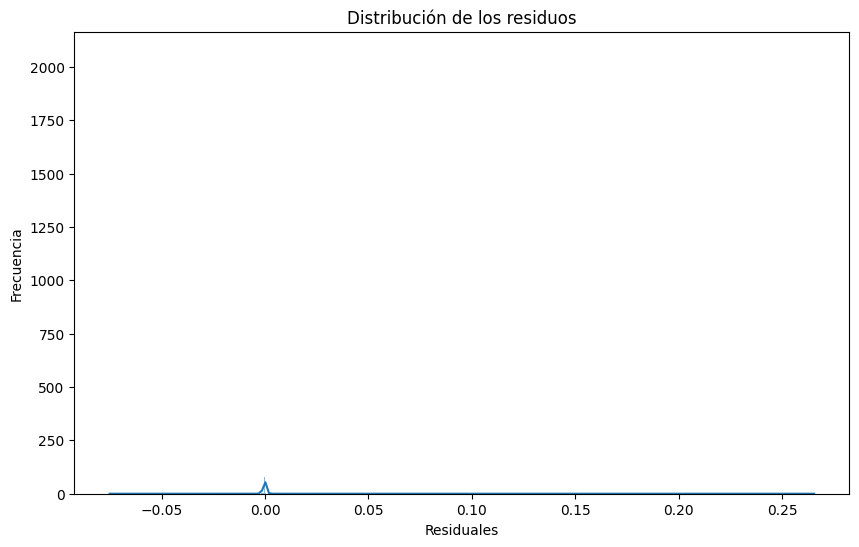

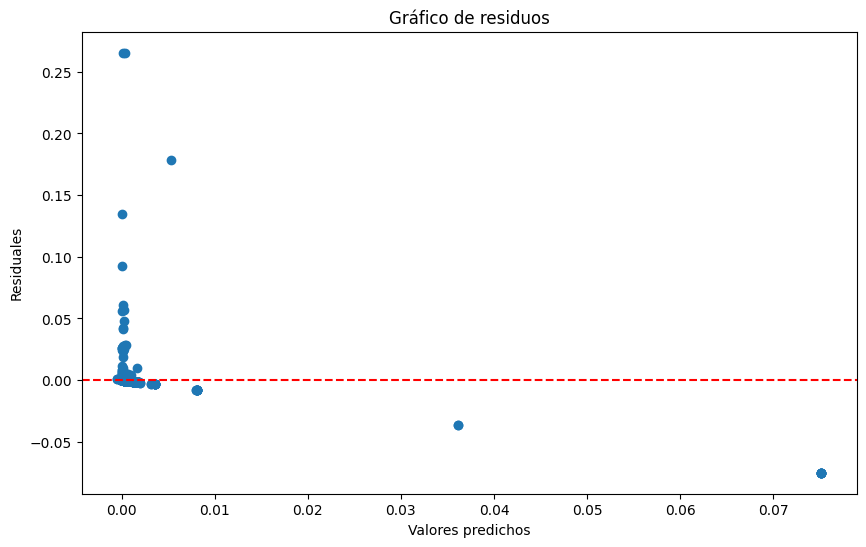

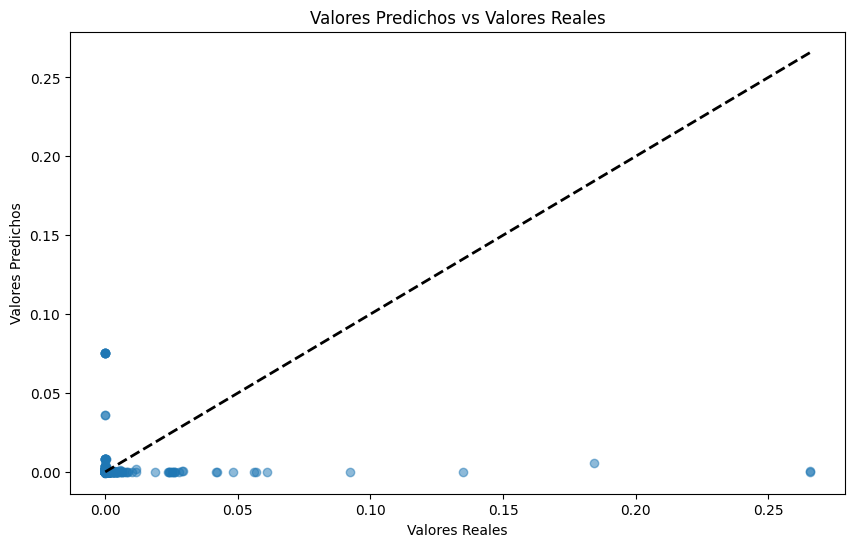

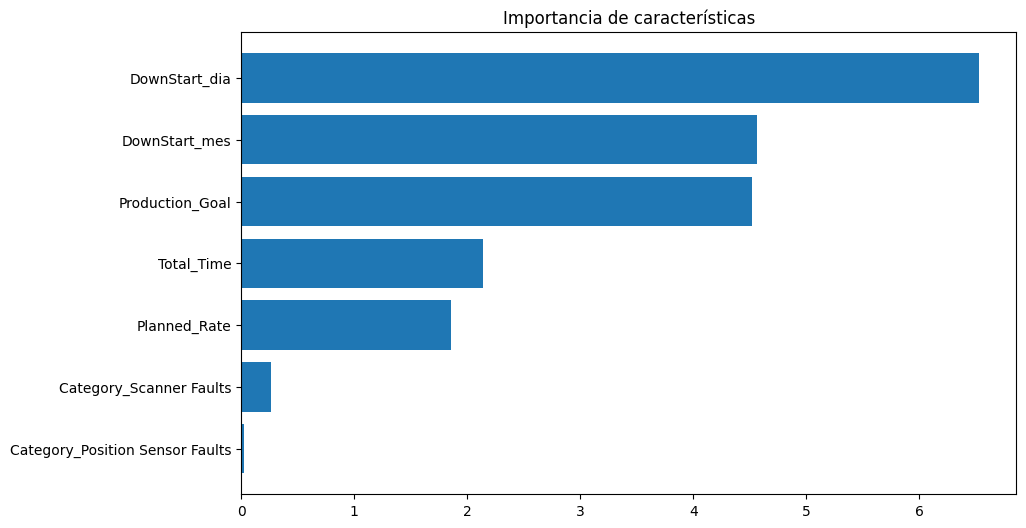

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

# Entrenar el modelo Stacking
stacking.fit(X_train_selected, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = stacking.predict(X_test_selected)

# Análisis de residuos
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuales')
plt.show()

# Gráfico de Predicción vs. Realidad
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Valores Predichos vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

# Gráfico de importancia de características
result = permutation_importance(stacking, X_test_selected, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(X_test_selected.shape[1]), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(X_test_selected.shape[1]), np.array(X.columns)[selector.get_support()][sorted_idx])
plt.title('Importancia de características')
plt.show()


###Mejor Distribución de los residuos

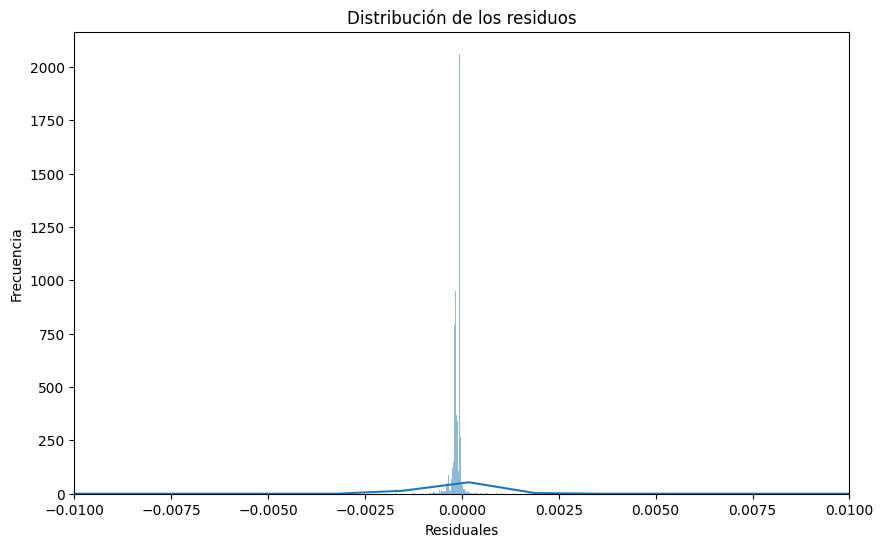

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de la distribución de los residuos con ajuste de escala
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.xlim(-0.01, 0.01)  # Ajustar los límites del eje x para una mejor visualización
plt.show()
